In [1]:
!pip install kaggle
!pip install xlsxwriter
!pip install transformers
!pip install datasets
!pip install transformers[sentencepiece] datasets
!pip install sentencepiece
!pip install openai

In [2]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download karkavelrajaj/amazon-sales-dataset/




The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Dataset URL: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/versions/
License(s): CC-BY-NC-SA-4.0
amazon-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('amazon-sales-dataset.zip', 'r') as f:
  #extract in current directory
  f.extractall()

In [4]:
!pip install seaborn

In [5]:
#Basic Libraries
import os
import numpy as np
import pandas as pd
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Text Handling Libraries
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import xlsxwriter
import scipy.spatial
import datetime

from datasets import load_dataset
from transformers import pipeline



c:\Users\DELL\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
import openai

# Replace with your OpenAI API key
api_key = input("sk-proj-Kut83g72QjTvFcJU1DQaT3BlbkFJYNTFEcnrSo98cvFuV2Hw")

openai.api_key = api_key


In [ ]:
## Load Data
df = pd.read_csv(r"I:\salesbotpatent1\src\nlp\amazon.csv")

In [ ]:
df.drop('rating_count',axis=1,inplace=True)
df.rename(columns={' product_id ':'ProdId','product_name':'ProdName','discounted_price':'DPrice','actual_price':'APrice',
                  'discount_percentage':'DPerct','about_product':'ProdDescr','user_id':'UID','user_name':'UName',
                  'product_link' :'ProdLink',
                  },
          inplace=True)

In [ ]:
df2 = df.copy(deep=True)


In [ ]:
# df2= df.copy(deep=True) #restore data

In [ ]:
# # dropping ALL duplicate values
# df2.drop_duplicates(subset="product_id",
#                      keep=False, inplace=True)
# df2.shape

In [ ]:
df2['Subcategory']=0
df2['Subcategory']=df2['Subcategory'].astype(str)

# iterate through each record of the column and change its datatype
for index, row in df2.iterrows():
    df2.at[index, 'Subcategory'] = row['category'].split("|")[-1]

df2.head(2)

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,review_id,review_title,review_content,img_link,ProdLink,Subcategory
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables


In [ ]:
df2.rating.value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [ ]:
for index, row in df2.iterrows():
  df2.at[index, 'rating'] = row['rating'].replace("|",'2.9')

df2.rating = df2.rating.astype(float)
df2.rating=df2.rating.fillna(np.mean(df2.rating), axis=0)

In [ ]:
df2.rating.head()

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64

In [ ]:
# #Filter out records with less than 8 records

n = 5
df2=df2.groupby("Subcategory").filter(lambda x: len(x) >= n )

# sample 8 rows from each group

# df2=df2.groupby('Subcategory').apply(lambda x: x.sample(n)).reset_index(drop=True)

df2.shape


(1213, 16)

In [ ]:
# df2.Subcategory.value_counts().to_csv("ProductsAcrossCategories.csv")


In [ ]:
#Upsample Df
from sklearn.utils import resample
catgr_counts=df2.Subcategory.value_counts()

for  index, items in enumerate(catgr_counts.iteritems()):
    item,count= items[0],items[1]
    item_df = df2[df2.Subcategory==item]
    # print("index :", index)
    # print("item,count :",item,count)
    if count < catgr_counts['RemoteControls']:
        df_upsample = resample(item_df,
             replace=True,
             n_samples=catgr_counts['RemoteControls'],
             random_state=42)
        # print("df_upsample_shape :", df_upsample.shape)
        df2=pd.concat([df2,df_upsample],axis=0)


<ipython-input-37-3de1f23e1a55>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for  index, items in enumerate(catgr_counts.iteritems()):


In [ ]:

# iterate through each record of the column and change its datatype
for index, row in df2.iterrows():
#     print("index: ", index, "DPrice :", row['DPrice'].replace(",","").replace("₹",""))
    df2.at[index, 'DPrice'] = float(str(row['DPrice']).replace(",","").replace("₹",""))

df2['DPrice']=df2['DPrice'].astype(int)
# print the updated dataframe
df2.dtypes


product_id         object
ProdName           object
category           object
DPrice              int64
APrice             object
DPerct             object
rating            float64
ProdDescr          object
UID                object
UName              object
review_id          object
review_title       object
review_content     object
img_link           object
ProdLink           object
Subcategory        object
dtype: object

In [ ]:
df_bkp=df2.copy(deep=True)

In [ ]:
# df2=df_bkp.copy(deep=True) #Restore data

In [ ]:
print("Min Price :" ,df2.DPrice.min(),"Max Price :", df2.DPrice.max())

Min Price : 39 Max Price : 77990


<Axes: >

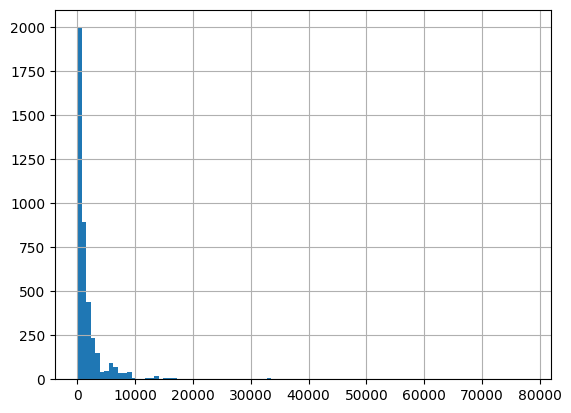

In [ ]:
df2['DPrice'].hist(bins=100)


<Axes: >

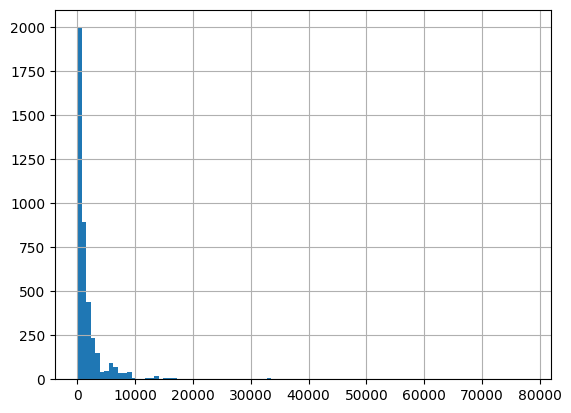

In [ ]:
df2['DPrice'].hist(bins=100)


In [ ]:
df2.dtypes

product_id         object
ProdName           object
category           object
DPrice              int64
APrice             object
DPerct             object
rating            float64
ProdDescr          object
UID                object
UName              object
review_id          object
review_title       object
review_content     object
img_link           object
ProdLink           object
Subcategory        object
dtype: object

In [ ]:
col = 'rating'
df2[col]=df2[col].astype(float)
conditions = [
              df2[col].between(0,3),   #CheapPrice  # inclusive = True is the default
              df2[col].between(3,4),  #LowPrice
              df2[col].ge(4) #LittleAboveLowPrice

             ]
choices = ["LR","MR","HR"]

df2['rBucket'] = np.select(conditions, choices, default=np.nan)
df2['rBucket'].unique()

array(['HR', 'MR', 'LR'], dtype=object)

In [ ]:
df2['rBucket'].value_counts()

HR    2651
MR    1502
LR      49
Name: rBucket, dtype: int64

In [ ]:
col = 'DPrice'
conditions = [
              df2[col].between(0,500),   #CheapPrice  # inclusive = True is the default
              df2[col].between(500,1000),  #LowPrice
              df2[col].ge(1000) #LittleAboveLowPrice

             ]
choices = ["Low","Medium","High"]

df2['DPBucket'] = np.select(conditions, choices, default=np.nan)
df2['DPBucket'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [ ]:
def couple(x):
    return ''.join(x['product_id']) + ' '+ ''.join(x['DPBucket'])+ ' '+ ''.join(x['rBucket']) + ' '+ ''.join(x['Subcategory'])

df2['product_classification_features'] = df2.apply(couple, axis=1)

In [ ]:
# Let’s calculate the cosine similarity of the product_classification_features for all the products.

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['product_classification_features'])


In [ ]:
# Define batch size
batch_size = 500

# Calculate number of batches
num_batches = int(count_matrix.shape[0] / batch_size)

# Initialize an empty array for results
cosine_sim = np.zeros((count_matrix.shape[0], count_matrix.shape[0]))

# Calculate cosine similarity in batches
for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    cosine_sim[start:end] = cosine_similarity(count_matrix[start:end], count_matrix)
    # print(cosine_sim.shape)

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim)
cosine_sim_df.shape

(4202, 4202)

In [ ]:
def content_recommendation_v1(title):
    a = df2.copy(deep=True).reset_index().drop('index',axis=1)
    index = a[a['product_id']==title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(11).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product_id']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df


In [ ]:
cosine_sim_df.shape

(4202, 4202)

In [ ]:
df3=pd.DataFrame()
uniqueProds=list(df2['product_id'].unique())
for prodID in uniqueProds:
    try:
        searchedProd=df2[df2['product_id']==prodID][['Subcategory','product_id','ProdName']].drop_duplicates().reset_index(drop=True).rename(columns={'product_id':'searchedProd'})
        # print("searchedProd :",prodID, "searchedProd shape :",searchedProd.shape)
        suggestedProdIDs=content_recommendation_v1(prodID)
        ProdsID=list(suggestedProdIDs['product_id'])
        # print("SuggestedProds length:",len(set(suggestedProdIDs['product_id'])))
        suggestedProds= pd.merge(suggestedProdIDs,df2[df2['product_id'].isin(ProdsID)][['product_id','Subcategory','ProdName']].drop_duplicates(),on='product_id',how='inner')
        # print("testing")
        suggestedProds=suggestedProds.rename(columns={'cosine_similarity':'Similarity_Score','product_id':'SuggProd_Id','ProdName':'SuggProdNames'})
        print("suggestedProds shape :",suggestedProds.shape)

        tmpDf=pd.concat([searchedProd,suggestedProds],axis=1).drop_duplicates(subset='SuggProd_Id').reset_index(drop=True)
#         print("tmpDf :",tmpDf)
        print("tmpDf shape :",tmpDf.shape)
        df3=pd.concat([tmpDf,df3],axis=0)
        # print("df3 shape :",df3.shape)
    except:
#         print("Error in prodID :",prodID)
        pass


suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (8, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (10, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (10, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (7, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (9, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (10, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (10, 7)
suggestedProds shape : (10, 4)
tmpDf shape : (10, 7)
suggest

In [ ]:
df3.shape

(7888, 7)

In [ ]:
###################################################################### Users Clustering #############################################3
#Seperate users for each product
newDf= pd.DataFrame(columns= ['UID',"ProdId","Subcategory","rating"])
for index, row in df2.iterrows():
  # print("usr :", type(row['UID']))
  usrs=row['UID'].split(",")
  tmpDf = pd.DataFrame({'UID': usrs,"ProdId":row['product_id'],"Subcategory": row["Subcategory"],"ProdName":row["ProdName"],'rating':row['rating']})
  newDf= pd.concat([newDf,tmpDf],axis=0,ignore_index = True)
  # print("df2 shape :",df2.shape)

newDf.head()

,UID,ProdId,Subcategory,rating,ProdName
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,USBCables,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,USBCables,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,USBCables,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,USBCables,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,USBCables,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...


In [ ]:
user_item_matrix = pd.pivot_table(newDf,index='UID',columns='ProdId')
user_item_matrix.columns=user_item_matrix.columns.droplevel(0)
user_item_matrix.fillna(0, inplace=True)
user_item_matrix.head()



<ipython-input-57-0915afd16c88>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  user_item_matrix = pd.pivot_table(newDf,index='UID',columns='ProdId')


ProdId,B002PD61Y4,B002SZEOLG,B003L62T7W,B004IO5BMQ,B005FYNT3G,B0085IATT6,B0085W2MUQ,B0088TKTY2,B008FWZGSG,B008IFXQFU,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
UID,,,,,,,,,,,,,,,,,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE22MK2NXQD3ZARLIOL3SLD4GU6A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE23WGYTUMB5R6JJMBU4V43JIW7Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

jaccard = scipy.spatial.distance.cdist(user_item_matrix, user_item_matrix,
                                       metric='jaccard')
user_distance = pd.DataFrame(jaccard, columns=user_item_matrix.index.values,
                             index=user_item_matrix.index.values)

In [ ]:
# prepare a dictionary
user_rankings = {}
# iterate over the columns in the dataframe
for user in user_distance.columns:
    # extract the distances of the column ranked by smallest
    distance = user_distance[user].nsmallest(len(user_distance))

    # for each user, create a key in the dictionary and assign a
    # list that contains a ranking of its most similar users
    data = {user : [i for i in distance.index if i!=user]}
    user_rankings.update(data)

In [ ]:
user_rankings['AE22MK2NXQD3ZARLIOL3SLD4GU6A'][0:10] #10 most similar users

['AG2GXBIXLFJD652RYILCZS44PBAA',
 'AHAHSX35S3ZUCKX2UAB3DPGWCYJA',
 'AEZSW3HIRJ2OUNDQHDJEB7NMGUWQ',
 'AFV75LSQUFRY327UWQEBYQKLFSMA',
 'AEPZDUAEBII7N7RRWKTPKON6HB3A',
 'AEUFMJPVYKUAB34FPZ53O2EE7VNQ',
 'AECUHYUPESWI2DB5JMEZQF77VWOA',
 'AGOKXS4TP2M6LTNG5HAEMLCKI2IA',
 'AGOJAM5G7KHARFVDHTRDFHZGR2IA',
 'AGOJ5KXS5VV6NQS3XHAGRDZ7S2BA']

In [ ]:

# Create two datetime objects
start_time = datetime.datetime.now()

df4=pd.DataFrame()

for index, (UID,simUsr) in enumerate(user_rankings.items()):
    print(" index :", index)
    try:
        searchedUID=newDf[newDf['UID']==UID][['UID','ProdId','Subcategory','ProdName','rating']].drop_duplicates().reset_index(drop=True)
        # print("searchedUID :",UID, "searchedUID shape :",searchedUID.shape)
        # print("searchedUID['Subcategory'].unique() :",searchedUID['Subcategory'].unique())

        # top 10 neighbours for each user

        sim_usrs_n=simUsr[0:10] #10 most similar users
        sim_usrs_df=newDf[newDf['UID'].isin(sim_usrs_n)].rename(columns={'UID':'SimilarUsers'}).reset_index(drop=True)

        tmpDf=pd.concat([searchedUID,sim_usrs_df],axis=1)
        # print("tmpDf :",tmpDf)
        # print("tmpDf shape :",tmpDf.shape)
        df4=pd.concat([tmpDf,df4],axis=0)
        print("df3 shape :",newDf.shape)
    except:
        # print("Except triggered")
        print("Error in UID :",UID)
        pass


end_time = datetime.datetime.now()

# Calculate the time difference in seconds
time_difference = (end_time - start_time).total_seconds()

print("The time difference is:", round(time_difference,2))


Streaming output truncated to the last 5000 lines.
df3 shape : (33263, 5)
 index : 4703
df3 shape : (33263, 5)
 index : 4704
df3 shape : (33263, 5)
 index : 4705
df3 shape : (33263, 5)
 index : 4706
df3 shape : (33263, 5)
 index : 4707
df3 shape : (33263, 5)
 index : 4708
df3 shape : (33263, 5)
 index : 4709
df3 shape : (33263, 5)
 index : 4710
df3 shape : (33263, 5)
 index : 4711
df3 shape : (33263, 5)
 index : 4712
df3 shape : (33263, 5)
 index : 4713
df3 shape : (33263, 5)
 index : 4714
df3 shape : (33263, 5)
 index : 4715
df3 shape : (33263, 5)
 index : 4716
df3 shape : (33263, 5)
 index : 4717
df3 shape : (33263, 5)
 index : 4718
df3 shape : (33263, 5)
 index : 4719
df3 shape : (33263, 5)
 index : 4720
df3 shape : (33263, 5)
 index : 4721
df3 shape : (33263, 5)
 index : 4722
df3 shape : (33263, 5)
 index : 4723
df3 shape : (33263, 5)
 index : 4724
df3 shape : (33263, 5)
 index : 4725
df3 shape : (33263, 5)
 index : 4726
df3 shape : (33263, 5)
 index : 4727
df3 shape : (33263, 5)
 

In [ ]:
df3.head()

,Subcategory,searchedProd,ProdName,SuggProd_Id,Similarity_Score,Subcategory,SuggProdNames
0,SandwichMakers,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,B01486F4G6,1.00,SandwichMakers,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
1,NaN,NaN,NaN,B07S851WX5,0.75,SandwichMakers,"Prestige Sandwich Maker PGMFD 01, Black"
2,NaN,NaN,NaN,B0B2DD8BQ8,0.75,SandwichMakers,Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...
3,NaN,NaN,NaN,B07GWTWFS2,0.75,SandwichMakers,KENT 16025 Sandwich Grill 700W | Non-Toxic Cer...
4,NaN,NaN,NaN,B09XRBJ94N,0.75,SandwichMakers,iBELL SM1301 3-in-1 Sandwich Maker with Detach...


In [ ]:
############################################## Sentiment Analysis #########################33

sentiment_classifier = pipeline(task="text-classification",
                                model="nickwong64/bert-base-uncased-poems-sentiment")

In [ ]:
df2.shape

(4202, 19)

In [ ]:
df2.tail()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,review_id,review_title,review_content,img_link,ProdLink,Subcategory,rBucket,DPBucket,product_classification_features
783,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps
710,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59,₹59,0%,3.8,"Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...","R3CEIRJ8YFRONO,R3ICE0RT3T14TH,R17764XIRZDB5H,R...","Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ...",https://m.media-amazon.com/images/I/413phG1P5U...,https://www.amazon.in/COSMOS-Portable-Flexible...,Lamps,MR,Low,B08TDJNM3G Low MR Lamps
783,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps
1020,B07QMRHWJD,SWAPKART Portable Flexible Adjustable Eye Prot...,Computers&Accessories|Accessories&Peripherals|...,298,₹999,70%,4.3,"14 Highlight LED Lamp,super bright white light...","AETGW4KBMIJPPNVLPKB7R7O3FSQQ,AEYRRD5MDFEO4UXUU...","Bhawna,Abhishek C,Richard P.,Vivek,Sonali G.,C...","RTNU6RMF947TL,R2EDFUKTI01DH4,R2DXZK9Y1QZKSU,R1...",Can be use as table lamp or emergency light fo...,"bright enough to read in close proximity, can ...",https://m.media-amazon.com/images/I/41d-eh65JL...,https://www.amazon.in/SWAPKART-Portable-Readin...,Lamps,HR,Low,B07QMRHWJD Low HR Lamps
783,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps


In [ ]:
df2.reset_index(drop=True,inplace=True)

In [ ]:
df2.shape

(4202, 19)

In [ ]:
df2.tail()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,review_id,review_title,review_content,img_link,ProdLink,Subcategory,rBucket,DPBucket,product_classification_features
4197,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps
4198,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59,₹59,0%,3.8,"Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...","R3CEIRJ8YFRONO,R3ICE0RT3T14TH,R17764XIRZDB5H,R...","Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ...",https://m.media-amazon.com/images/I/413phG1P5U...,https://www.amazon.in/COSMOS-Portable-Flexible...,Lamps,MR,Low,B08TDJNM3G Low MR Lamps
4199,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps
4200,B07QMRHWJD,SWAPKART Portable Flexible Adjustable Eye Prot...,Computers&Accessories|Accessories&Peripherals|...,298,₹999,70%,4.3,"14 Highlight LED Lamp,super bright white light...","AETGW4KBMIJPPNVLPKB7R7O3FSQQ,AEYRRD5MDFEO4UXUU...","Bhawna,Abhishek C,Richard P.,Vivek,Sonali G.,C...","RTNU6RMF947TL,R2EDFUKTI01DH4,R2DXZK9Y1QZKSU,R1...",Can be use as table lamp or emergency light fo...,"bright enough to read in close proximity, can ...",https://m.media-amazon.com/images/I/41d-eh65JL...,https://www.amazon.in/SWAPKART-Portable-Readin...,Lamps,HR,Low,B07QMRHWJD Low HR Lamps
4201,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...","R1YVU5NMCJDX8M,R3MG5C14NRKOHR,R1T3DO26SFI3TL,R...","Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps


In [ ]:
sentiment_classifier(df2.ProdDescr)[0]


In [ ]:
# Create two datetime objects
start_time = datetime.datetime.now()

df2['label'],df2['score']=0,0

for index, row in df2.iterrows():
  try:
    print("index :",index)
    results= sentiment_classifier(row['review_content'])[0]
    # print("results :",results)
    df2.at[index,'label'], df2.at[index,'score'] = results['label'], round(results['score']*100,2)

  except:
    print("except index :",index)
    pass

end_time = datetime.datetime.now()

# Calculate the time difference in seconds
time_difference = (end_time - start_time).total_seconds()

print("The time difference is:", round((time_difference/60),2))

index : 0
index : 1
index : 2
index : 3


Token indices sequence length is longer than the specified maximum sequence length for this model (577 > 512). Running this sequence through the model will result in indexing errors


index : 4
except index : 4
index : 5
index : 6
index : 7
index : 8
except index : 8
index : 9
index : 10
index : 11
index : 12
index : 13
index : 14
index : 15
index : 16
index : 17
index : 18
index : 19
index : 20
index : 21
index : 22
index : 23
index : 24
except index : 24
index : 25
index : 26
except index : 26
index : 27
index : 28
index : 29
index : 30
index : 31
index : 32
index : 33
index : 34
index : 35
index : 36
index : 37
index : 38
except index : 38
index : 39
index : 40
index : 41
except index : 41
index : 42
index : 43
index : 44
index : 45
index : 46
index : 47
index : 48
index : 49
except index : 49
index : 50
except index : 50
index : 51
except index : 51
index : 52
index : 53
except index : 53
index : 54
index : 55
index : 56
except index : 56
index : 57
except index : 57
index : 58
index : 59
index : 60
index : 61
except index : 61
index : 62
index : 63
index : 64
index : 65
index : 66
index : 67
index : 68
index : 69
index : 70
index : 71
index : 72
index : 73
inde

In [ ]:
df2.head()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,...,review_title,review_content,img_link,ProdLink,Subcategory,rBucket,DPBucket,product_classification_features,label,score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"₹1,099",64%,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables,HR,Low,B07JW9H4J1 Low HR USBCables,positive,81.39
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,₹349,43%,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables,MR,Low,B098NS6PVG Low MR USBCables,no_impact,96.35
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"₹1,899",90%,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables,MR,Low,B096MSW6CT Low MR USBCables,positive,99.04
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,₹699,53%,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables,HR,Low,B08HDJ86NZ Low HR USBCables,no_impact,89.45
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,₹399,61%,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables,HR,Low,B08CF3B7N1 Low HR USBCables,0,0.00


In [ ]:
df2.shape

(4202, 21)

In [ ]:
df2.tail()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,...,review_title,review_content,img_link,ProdLink,Subcategory,rBucket,DPBucket,product_classification_features,label,score
4197,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,"Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63
4198,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59,₹59,0%,3.8,"Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...",...,"Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ...",https://m.media-amazon.com/images/I/413phG1P5U...,https://www.amazon.in/COSMOS-Portable-Flexible...,Lamps,MR,Low,B08TDJNM3G Low MR Lamps,positive,99.02
4199,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,"Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63
4200,B07QMRHWJD,SWAPKART Portable Flexible Adjustable Eye Prot...,Computers&Accessories|Accessories&Peripherals|...,298,₹999,70%,4.3,"14 Highlight LED Lamp,super bright white light...","AETGW4KBMIJPPNVLPKB7R7O3FSQQ,AEYRRD5MDFEO4UXUU...","Bhawna,Abhishek C,Richard P.,Vivek,Sonali G.,C...",...,Can be use as table lamp or emergency light fo...,"bright enough to read in close proximity, can ...",https://m.media-amazon.com/images/I/41d-eh65JL...,https://www.amazon.in/SWAPKART-Portable-Readin...,Lamps,HR,Low,B07QMRHWJD Low HR Lamps,no_impact,93.30
4201,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,"Good & attractive,Very versatile,Good,Good Pro...",Some USB ports are little loose but I will man...,https://m.media-amazon.com/images/I/318Gp3pIqX...,https://www.amazon.in/DASITON-Flexible-Ambient...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63


In [ ]:
############################################## Generate Questions #########################33

# Create two datetime objects
start_time = datetime.datetime.now()

df2['Q1'],df2['Q2'],df2['Q3'],df2['Q4']=0,0,0,0

# Generate questions for each record of dataset
for index, row in df2.iterrows():
    print("index :", index)
    prompt = f"Generate 4 questions from the following text:\n{row.ProdDescr}\nQuestions:"
    # Request to the OpenAI API
    response = openai.Completion.create(
        engine="text-davinci-002",  # You can experiment with different engines
        prompt=prompt,
        max_tokens=50,  # Adjust this based on the expected length of the questions
        api_key=api_key
    )

    # Extract the generated questions from the API response
    generated_questions = response.choices[0].text.strip()
    Qs= [question[3:] for question in generated_questions.split("\n")]
    if len(Qs)==4:
        df2.loc[index,'Q1']=Qs[0]
        df2.loc[index,'Q2']=Qs[1]
        df2.loc[index,'Q3']=Qs[2]
        df2.loc[index,'Q4']=Qs[3]
    elif len(Qs)==3:
        df2.loc[index,'Q1']=Qs[0]
        df2.loc[index,'Q2']=Qs[1]
        df2.loc[index,'Q3']=Qs[2]
    elif len(Qs)==2:
        df2.loc[index,'Q1']=Qs[0]
        df2.loc[index,'Q2']=Qs[1]
    elif len(Qs)==1:
        df2.loc[index,'Q1']=Qs[0]
    else:
        print(" else block at {index} index Qs :",Qs)


end_time = datetime.datetime.now()

# Calculate the time difference in seconds
time_difference = (end_time - start_time).total_seconds()

print("The time difference is:", round((time_difference/60),2), "mnts")

index : 0
index : 1
index : 2
index : 3
index : 4
index : 5
index : 6
index : 7
index : 8
index : 9
index : 10
index : 11
index : 12
index : 13
index : 14
index : 15
index : 16
index : 17
index : 18
index : 19
index : 20
index : 21
index : 22
index : 23
index : 24
index : 25
index : 26
index : 27
index : 28
index : 29
index : 30
index : 31
index : 32
index : 33
index : 34
index : 35
index : 36
index : 37
index : 38
index : 39
index : 40
index : 41
index : 42
index : 43
index : 44
index : 45
index : 46
index : 47
index : 48
index : 49
index : 50
index : 51
index : 52
index : 53
index : 54
index : 55
index : 56
index : 57
index : 58
index : 59
index : 60
index : 61
index : 62
index : 63
index : 64
index : 65
index : 66
index : 67
index : 68
index : 69
index : 70
index : 71
index : 72
index : 73
index : 74
index : 75
index : 76
index : 77
index : 78
index : 79
 else block at {index} index Qs : ['What devices is this remote compatible with?', '', 'How do you pair the remote with your devic

In [ ]:
df2.tail()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,...,Subcategory,rBucket,DPBucket,product_classification_features,label,score,Q1,Q2,Q3,Q4
4197,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,How long will the light source last?,What are some of the benefits of using this ni...,How many watts does this night light
4198,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59,₹59,0%,3.8,"Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...",...,Lamps,MR,Low,B08TDJNM3G Low MR Lamps,positive,99.02,What are the main features of this product?,Is this product easy to use?,Does this product provide maximum illumination?,Does this product have multiple uses?
4199,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,How is the light emitted from the night light?,What is the power consumption of this night li...,What is the expected lifespan of the
4200,B07QMRHWJD,SWAPKART Portable Flexible Adjustable Eye Prot...,Computers&Accessories|Accessories&Peripherals|...,298,₹999,70%,4.3,"14 Highlight LED Lamp,super bright white light...","AETGW4KBMIJPPNVLPKB7R7O3FSQQ,AEYRRD5MDFEO4UXUU...","Bhawna,Abhishek C,Richard P.,Vivek,Sonali G.,C...",...,Lamps,HR,Low,B07QMRHWJD Low HR Lamps,no_impact,93.30,What is the lifespan of the LED Lamp?,How bright is the LED Lamp?,What is the power consumption of the LED Lamp?,What is the size of the LED Lamp?
4201,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,What is the power for this light?,What is the voltage for this light?,What is the color of this light?


In [ ]:
df2.shape

(4202, 25)

In [ ]:
########################

######################## Answer users' question ###############################
from transformers import BertTokenizer, BertForQuestionAnswering,BertForMaskedLM
import torch




# Load the pre-trained BERT model and tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")

# model = BertForMaskedLM.from_pretrained("bert-base-uncased")
# model.eval()  # Set the model to evaluation mode



In [ ]:
# Function to answer a list of questions
def answer_questions(questions, context):
    responses = []

    for question in questions:
        response = openai.Completion.create(
            engine="davinci",  # You can use another engine if needed
            prompt=f"Question: {question}\nContext: {context}\nAnswer:",
            max_tokens=50,  # Adjust max_tokens as per your needs
            n=1,  # Number of completions to generate
        )
        answer = response.choices[0].text.strip()
        responses.append(answer)

    return responses


In [ ]:
df2.tail()

,product_id,ProdName,category,DPrice,APrice,DPerct,rating,ProdDescr,UID,UName,...,Subcategory,rBucket,DPBucket,product_classification_features,label,score,Q1,Q2,Q3,Q4
4197,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,How long will the light source last?,What are some of the benefits of using this ni...,How many watts does this night light
4198,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59,₹59,0%,3.8,"Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...",...,Lamps,MR,Low,B08TDJNM3G Low MR Lamps,positive,99.02,What are the main features of this product?,Is this product easy to use?,Does this product provide maximum illumination?,Does this product have multiple uses?
4199,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,How is the light emitted from the night light?,What is the power consumption of this night li...,What is the expected lifespan of the
4200,B07QMRHWJD,SWAPKART Portable Flexible Adjustable Eye Prot...,Computers&Accessories|Accessories&Peripherals|...,298,₹999,70%,4.3,"14 Highlight LED Lamp,super bright white light...","AETGW4KBMIJPPNVLPKB7R7O3FSQQ,AEYRRD5MDFEO4UXUU...","Bhawna,Abhishek C,Richard P.,Vivek,Sonali G.,C...",...,Lamps,HR,Low,B07QMRHWJD Low HR Lamps,no_impact,93.30,What is the lifespan of the LED Lamp?,How bright is the LED Lamp?,What is the power consumption of the LED Lamp?,What is the size of the LED Lamp?
4201,B09N6TTHT6,E-COSMOS Plug in LED Night Light Mini USB LED ...,Computers&Accessories|Accessories&Peripherals|...,89,₹99,10%,4.2,Multi-purpose: you can use it as night sleepin...,"AECKRXKG6P4WDPQMPD3XPO5ZZ5QA,AF23F2BUJEUNAGZDI...","ABHISHEK SAXENA,C.M. Dhananjayan,Yash,AMIT KUM...",...,Lamps,HR,Low,B09N6TTHT6 Low HR Lamps,no_impact,99.63,What is the light source for this night light?,What is the power for this light?,What is the voltage for this light?,What is the color of this light?


In [ ]:
df2.shape

(4202, 25)

In [ ]:
#########################Answer questions ########################

start_time = datetime.datetime.now()

df2['A1'],df2['A2'],df2['A3'],df2['A4']=0,0,0,0

# Answer the questions
for index, row in df2.iterrows():
  print("index :",index)
  questions= [row.Q1,row.Q2,row.Q3,row.Q4]
  try:
      context = row.ProdDescr
      Answs = answer_questions(questions, context)
      if len(Answs)==4:
          df2.loc[index,'A1']=Answs[0]
          df2.loc[index,'A2']=Answs[1]
          df2.loc[index,'A3']=Answs[2]
          df2.loc[index,'A4']=Answs[3]
      elif len(Answs)==3:
          df2.loc[index,'A1']=Answs[0]
          df2.loc[index,'A2']=Answs[1]
          df2.loc[index,'A3']=Answs[2]
      elif len(Answs)==2:
          df2.loc[index,'A1']=Answs[0]
          df2.loc[index,'A2']=Answs[1]
      elif len(Answs)==1:
          df2.loc[index,'A1']=Answs[0]
      else:
          print(" else block at {index} index Answs :",Answs)



  except:
    print("error at index :", index)
    pass


end_time = datetime.datetime.now()

# Calculate the time difference in seconds
time_difference = (end_time - start_time).total_seconds()

print("The time difference is:", round((time_difference/60),2), "mnts")

Streaming output truncated to the last 5000 lines.
index : 1235
index : 1236
index : 1237
index : 1238
index : 1239
index : 1240
index : 1241
index : 1242
index : 1243
index : 1244
index : 1245
index : 1246
index : 1247
index : 1248
index : 1249
index : 1250
index : 1251
index : 1252
index : 1253
index : 1254
index : 1255
index : 1256
index : 1257
index : 1258
index : 1259
index : 1260
index : 1261
index : 1262
index : 1263
index : 1264
index : 1265
index : 1266
index : 1267
index : 1268
index : 1269
index : 1270
index : 1271
index : 1272
index : 1273
index : 1274
index : 1275
index : 1276
index : 1277
index : 1278
index : 1279
index : 1280
index : 1281
index : 1282
index : 1283
index : 1284
index : 1285
index : 1286
index : 1287
index : 1288
index : 1289
index : 1290
index : 1291
index : 1292
index : 1293
index : 1294
index : 1295
index : 1296
index : 1297
index : 1298
index : 1299
index : 1300
index : 1301
index : 1302
index : 1303
index : 1304
index : 1305
index : 1306
index : 1307


In [ ]:
############################### Summarize Product Description to users ##############################333
summarizer = pipeline(task="summarization",
                      model = "t5-small",
                       min_length=20,
                       max_length=40,
                       truncation=True)

In [ ]:
start_time = datetime.datetime.now()


df2['ProdSummary']= 0

for index, row in df2.iterrows():
  try:
    print("index :",index)
    results= summarizer(row['ProdDescr'])[0]['summary_text']
    df2.at[index,'ProdSummary'] = results
  except:
    print("except index :",index)
    pass

end_time = datetime.datetime.now()

# Calculate the time difference in seconds
time_difference = (end_time - start_time).total_seconds()

print("The time difference is:", round((time_difference/60),2), "mnts")

index : 0
index : 1
index : 2
index : 3
index : 4
index : 5
index : 6
index : 7
index : 8
index : 9
index : 10
index : 11
index : 12
index : 13
index : 14
index : 15
index : 16
index : 17
index : 18
index : 19
index : 20
index : 21
index : 22
index : 23
index : 24
index : 25
index : 26
index : 27
index : 28
index : 29
index : 30
index : 31
index : 32


Your max_length is set to 40, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 33
index : 34
index : 35
index : 36
index : 37
index : 38
index : 39
index : 40
index : 41
index : 42
index : 43
index : 44
index : 45
index : 46
index : 47
index : 48
index : 49
index : 50
index : 51


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 52
index : 53
index : 54


Your max_length is set to 40, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


index : 55
index : 56
index : 57
index : 58
index : 59


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 60
index : 61
index : 62
index : 63
index : 64
index : 65
index : 66
index : 67


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 68
index : 69
index : 70
index : 71
index : 72
index : 73
index : 74
index : 75
index : 76
index : 77
index : 78
index : 79
index : 80
index : 81
index : 82
index : 83
index : 84
index : 85
index : 86
index : 87
index : 88
index : 89
index : 90
index : 91
index : 92
index : 93
index : 94
index : 95
index : 96
index : 97
index : 98
index : 99
index : 100


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 101
index : 102
index : 103
index : 104
index : 105
index : 106
index : 107
index : 108
index : 109
index : 110
index : 111
index : 112
index : 113
index : 114
index : 115


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 116
index : 117
index : 118


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 119


Your max_length is set to 40, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 120
index : 121
index : 122
index : 123
index : 124
index : 125
index : 126
index : 127
index : 128
index : 129
index : 130


Your max_length is set to 40, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


index : 131


Your max_length is set to 40, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 132
index : 133
index : 134
index : 135
index : 136
index : 137
index : 138
index : 139
index : 140
index : 141
index : 142


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 143


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 144
index : 145
index : 146
index : 147
index : 148
index : 149


Your max_length is set to 40, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


index : 150
index : 151
index : 152
index : 153
index : 154
index : 155
index : 156
index : 157
index : 158
index : 159
index : 160
index : 161
index : 162
index : 163
index : 164
index : 165
index : 166
index : 167
index : 168
index : 169
index : 170
index : 171
index : 172
index : 173
index : 174
index : 175
index : 176
index : 177
index : 178
index : 179
index : 180
index : 181
index : 182
index : 183
index : 184
index : 185
index : 186
index : 187
index : 188
index : 189


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 190
index : 191


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 192
index : 193
index : 194
index : 195
index : 196
index : 197
index : 198
index : 199
index : 200
index : 201
index : 202
index : 203
index : 204
index : 205
index : 206
index : 207
index : 208
index : 209


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 210
index : 211
index : 212
index : 213
index : 214
index : 215
index : 216
index : 217
index : 218


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 219
index : 220
index : 221
index : 222
index : 223
index : 224
index : 225
index : 226
index : 227
index : 228
index : 229
index : 230
index : 231
index : 232
index : 233
index : 234
index : 235
index : 236
index : 237
index : 238
index : 239
index : 240
index : 241
index : 242
index : 243
index : 244
index : 245
index : 246
index : 247
index : 248
index : 249


Your max_length is set to 40, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 250
index : 251
index : 252
index : 253
index : 254
index : 255
index : 256
index : 257
index : 258
index : 259
index : 260
index : 261
index : 262
index : 263
index : 264
index : 265
index : 266
index : 267


Your max_length is set to 40, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 268
index : 269
index : 270
index : 271
index : 272
index : 273
index : 274
index : 275
index : 276
index : 277
index : 278
index : 279
index : 280
index : 281
index : 282
index : 283
index : 284
index : 285
index : 286
index : 287
index : 288
index : 289
index : 290
index : 291
index : 292
index : 293
index : 294
index : 295
index : 296
index : 297
index : 298
index : 299
index : 300
index : 301
index : 302
index : 303
index : 304
index : 305
index : 306
index : 307
index : 308
index : 309
index : 310
index : 311
index : 312
index : 313
index : 314
index : 315
index : 316
index : 317
index : 318
index : 319
index : 320
index : 321
index : 322
index : 323
index : 324
index : 325
index : 326
index : 327
index : 328
index : 329
index : 330
index : 331
index : 332
index : 333
index : 334
index : 335


Your max_length is set to 40, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 336


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 337
index : 338
index : 339
index : 340
index : 341
index : 342
index : 343
index : 344
index : 345
index : 346
index : 347
index : 348
index : 349
index : 350
index : 351
index : 352
index : 353
index : 354
index : 355
index : 356
index : 357
index : 358
index : 359
index : 360
index : 361
index : 362
index : 363
index : 364
index : 365
index : 366
index : 367
index : 368
index : 369
index : 370
index : 371
index : 372
index : 373
index : 374
index : 375
index : 376
index : 377
index : 378
index : 379
index : 380
index : 381
index : 382
index : 383
index : 384
index : 385
index : 386
index : 387
index : 388
index : 389
index : 390
index : 391
index : 392
index : 393
index : 394
index : 395
index : 396
index : 397
index : 398
index : 399
index : 400


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 401
index : 402
index : 403
index : 404
index : 405
index : 406
index : 407


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 408
index : 409
index : 410
index : 411
index : 412
index : 413
index : 414
index : 415
index : 416
index : 417
index : 418
index : 419
index : 420
index : 421
index : 422
index : 423
index : 424
index : 425
index : 426
index : 427
index : 428
index : 429
index : 430
index : 431
index : 432
index : 433
index : 434
index : 435
index : 436
index : 437
index : 438
index : 439
index : 440
index : 441


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 442
index : 443
index : 444
index : 445
index : 446
index : 447
index : 448
index : 449
index : 450
index : 451
index : 452
index : 453
index : 454
index : 455
index : 456
index : 457
index : 458
index : 459
index : 460
index : 461
index : 462
index : 463
index : 464
index : 465
index : 466
index : 467
index : 468
index : 469
index : 470
index : 471
index : 472
index : 473
index : 474
index : 475
index : 476
index : 477
index : 478
index : 479
index : 480
index : 481
index : 482
index : 483
index : 484
index : 485
index : 486
index : 487
index : 488
index : 489
index : 490
index : 491
index : 492
index : 493
index : 494
index : 495


Your max_length is set to 40, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 496
index : 497
index : 498
index : 499
index : 500
index : 501
index : 502
index : 503
index : 504
index : 505
index : 506
index : 507
index : 508
index : 509


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 510
index : 511
index : 512
index : 513
index : 514
index : 515
index : 516
index : 517
index : 518
index : 519
index : 520
index : 521
index : 522
index : 523


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 524
index : 525


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 526
index : 527
index : 528
index : 529
index : 530
index : 531
index : 532
index : 533
index : 534
index : 535
index : 536
index : 537
index : 538
index : 539
index : 540
index : 541
index : 542
index : 543
index : 544
index : 545
index : 546
index : 547
index : 548
index : 549
index : 550
index : 551
index : 552
index : 553
index : 554
index : 555
index : 556
index : 557
index : 558
index : 559
index : 560
index : 561
index : 562
index : 563
index : 564
index : 565
index : 566
index : 567
index : 568
index : 569
index : 570
index : 571
index : 572
index : 573
index : 574
index : 575
index : 576
index : 577
index : 578
index : 579
index : 580
index : 581
index : 582
index : 583
index : 584
index : 585
index : 586
index : 587
index : 588
index : 589
index : 590
index : 591
index : 592
index : 593
index : 594
index : 595
index : 596
index : 597


Your max_length is set to 40, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 598
index : 599
index : 600
index : 601
index : 602
index : 603
index : 604
index : 605
index : 606
index : 607
index : 608
index : 609


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 610
index : 611
index : 612
index : 613
index : 614
index : 615
index : 616
index : 617
index : 618
index : 619
index : 620
index : 621
index : 622
index : 623
index : 624
index : 625
index : 626
index : 627
index : 628
index : 629
index : 630
index : 631
index : 632
index : 633
index : 634
index : 635
index : 636
index : 637
index : 638
index : 639
index : 640
index : 641


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 642
index : 643
index : 644
index : 645
index : 646
index : 647
index : 648
index : 649
index : 650
index : 651
index : 652
index : 653
index : 654
index : 655
index : 656
index : 657
index : 658
index : 659
index : 660
index : 661
index : 662
index : 663
index : 664
index : 665
index : 666
index : 667
index : 668
index : 669
index : 670
index : 671
index : 672
index : 673
index : 674
index : 675
index : 676
index : 677
index : 678
index : 679
index : 680


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 681


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 682
index : 683
index : 684
index : 685
index : 686
index : 687
index : 688
index : 689
index : 690
index : 691
index : 692


Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 693
index : 694
index : 695
index : 696
index : 697
index : 698
index : 699
index : 700
index : 701
index : 702
index : 703
index : 704
index : 705
index : 706
index : 707
index : 708
index : 709
index : 710


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 711
index : 712
index : 713
index : 714
index : 715
index : 716
index : 717
index : 718
index : 719
index : 720
index : 721
index : 722
index : 723
index : 724
index : 725
index : 726
index : 727
index : 728


Your max_length is set to 40, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 729
index : 730
index : 731
index : 732
index : 733
index : 734
index : 735
index : 736
index : 737
index : 738
index : 739
index : 740
index : 741
index : 742
index : 743
index : 744
index : 745
index : 746
index : 747
index : 748
index : 749
index : 750
index : 751
index : 752
index : 753
index : 754
index : 755
index : 756
index : 757
index : 758
index : 759
index : 760
index : 761
index : 762
index : 763
index : 764
index : 765
index : 766


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 767
index : 768
index : 769
index : 770
index : 771
index : 772


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 773
index : 774
index : 775
index : 776
index : 777
index : 778
index : 779
index : 780
index : 781
index : 782
index : 783
index : 784
index : 785
index : 786
index : 787
index : 788
index : 789
index : 790
index : 791
index : 792
index : 793
index : 794
index : 795
index : 796
index : 797
index : 798
index : 799
index : 800
index : 801
index : 802
index : 803
index : 804
index : 805
index : 806
index : 807
index : 808
index : 809
index : 810
index : 811
index : 812
index : 813
index : 814
index : 815
index : 816
index : 817
index : 818
index : 819
index : 820
index : 821
index : 822
index : 823
index : 824
index : 825
index : 826
index : 827
index : 828
index : 829
index : 830
index : 831
index : 832
index : 833
index : 834
index : 835
index : 836
index : 837
index : 838
index : 839
index : 840
index : 841
index : 842
index : 843
index : 844
index : 845
index : 846
index : 847
index : 848
index : 849
index : 850
index : 851
index : 852
index : 853
index : 854
index : 855
inde

Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 862
index : 863
index : 864
index : 865
index : 866


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 867
index : 868
index : 869
index : 870
index : 871
index : 872
index : 873
index : 874
index : 875
index : 876
index : 877
index : 878
index : 879
index : 880
index : 881
index : 882
index : 883
index : 884
index : 885
index : 886
index : 887
index : 888
index : 889
index : 890
index : 891
index : 892
index : 893
index : 894
index : 895
index : 896
index : 897
index : 898
index : 899
index : 900
index : 901
index : 902
index : 903
index : 904
index : 905
index : 906
index : 907
index : 908
index : 909
index : 910
index : 911
index : 912
index : 913
index : 914
index : 915
index : 916
index : 917
index : 918
index : 919
index : 920
index : 921
index : 922
index : 923
index : 924
index : 925
index : 926
index : 927
index : 928
index : 929
index : 930
index : 931
index : 932
index : 933


Your max_length is set to 40, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 934
index : 935
index : 936
index : 937
index : 938
index : 939
index : 940


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 941
index : 942
index : 943
index : 944
index : 945
index : 946
index : 947
index : 948
index : 949
index : 950
index : 951
index : 952
index : 953
index : 954
index : 955
index : 956
index : 957
index : 958
index : 959


Your max_length is set to 40, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 960


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 961
index : 962
index : 963
index : 964
index : 965
index : 966
index : 967
index : 968
index : 969
index : 970
index : 971
index : 972
index : 973
index : 974
index : 975
index : 976
index : 977
index : 978
index : 979
index : 980
index : 981
index : 982
index : 983
index : 984
index : 985
index : 986
index : 987
index : 988
index : 989
index : 990
index : 991
index : 992
index : 993


Your max_length is set to 40, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 994
index : 995
index : 996
index : 997
index : 998
index : 999
index : 1000
index : 1001
index : 1002
index : 1003
index : 1004
index : 1005
index : 1006
index : 1007
index : 1008
index : 1009
index : 1010
index : 1011
index : 1012
index : 1013
index : 1014
index : 1015
index : 1016
index : 1017
index : 1018
index : 1019
index : 1020
index : 1021
index : 1022
index : 1023
index : 1024
index : 1025
index : 1026
index : 1027
index : 1028
index : 1029
index : 1030


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1031
index : 1032
index : 1033
index : 1034
index : 1035
index : 1036
index : 1037
index : 1038
index : 1039
index : 1040
index : 1041
index : 1042
index : 1043
index : 1044
index : 1045
index : 1046
index : 1047
index : 1048
index : 1049
index : 1050
index : 1051
index : 1052
index : 1053


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1054
index : 1055
index : 1056
index : 1057
index : 1058
index : 1059
index : 1060
index : 1061
index : 1062


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 1063
index : 1064
index : 1065
index : 1066
index : 1067
index : 1068
index : 1069
index : 1070
index : 1071
index : 1072
index : 1073
index : 1074
index : 1075
index : 1076
index : 1077
index : 1078
index : 1079
index : 1080
index : 1081
index : 1082
index : 1083
index : 1084
index : 1085
index : 1086
index : 1087
index : 1088
index : 1089
index : 1090
index : 1091
index : 1092
index : 1093
index : 1094
index : 1095
index : 1096
index : 1097
index : 1098
index : 1099
index : 1100


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1101
index : 1102
index : 1103
index : 1104
index : 1105
index : 1106
index : 1107
index : 1108
index : 1109
index : 1110
index : 1111
index : 1112
index : 1113
index : 1114
index : 1115
index : 1116


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1117
index : 1118


Your max_length is set to 40, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1119
index : 1120


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 1121
index : 1122
index : 1123
index : 1124
index : 1125
index : 1126
index : 1127
index : 1128
index : 1129
index : 1130
index : 1131
index : 1132
index : 1133
index : 1134
index : 1135
index : 1136
index : 1137
index : 1138
index : 1139
index : 1140
index : 1141
index : 1142
index : 1143
index : 1144
index : 1145
index : 1146
index : 1147
index : 1148


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1149
index : 1150
index : 1151


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 1152
index : 1153
index : 1154
index : 1155
index : 1156
index : 1157
index : 1158
index : 1159
index : 1160
index : 1161
index : 1162
index : 1163
index : 1164
index : 1165
index : 1166
index : 1167
index : 1168
index : 1169


Your max_length is set to 40, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1170
index : 1171
index : 1172
index : 1173
index : 1174
index : 1175
index : 1176
index : 1177
index : 1178
index : 1179
index : 1180
index : 1181
index : 1182
index : 1183
index : 1184


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 1185
index : 1186
index : 1187
index : 1188
index : 1189
index : 1190
index : 1191
index : 1192
index : 1193
index : 1194
index : 1195


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 1196
index : 1197
index : 1198
index : 1199
index : 1200


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1201
index : 1202
index : 1203


Your max_length is set to 40, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


index : 1204
index : 1205
index : 1206
index : 1207
index : 1208
index : 1209
index : 1210


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 1211
index : 1212
index : 1213
index : 1214
index : 1215
index : 1216
index : 1217
index : 1218
index : 1219
index : 1220
index : 1221
index : 1222
index : 1223
index : 1224
index : 1225
index : 1226
index : 1227
index : 1228
index : 1229
index : 1230


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 1231
index : 1232
index : 1233
index : 1234
index : 1235
index : 1236
index : 1237
index : 1238
index : 1239
index : 1240
index : 1241


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 1242
index : 1243
index : 1244
index : 1245
index : 1246
index : 1247
index : 1248
index : 1249
index : 1250
index : 1251
index : 1252
index : 1253
index : 1254
index : 1255
index : 1256
index : 1257
index : 1258
index : 1259
index : 1260
index : 1261
index : 1262
index : 1263
index : 1264


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 1265
index : 1266
index : 1267
index : 1268
index : 1269
index : 1270


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 1271


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 1272
index : 1273
index : 1274
index : 1275
index : 1276
index : 1277
index : 1278
index : 1279
index : 1280
index : 1281
index : 1282
index : 1283
index : 1284
index : 1285
index : 1286
index : 1287
index : 1288
index : 1289
index : 1290
index : 1291
index : 1292
index : 1293
index : 1294
index : 1295
index : 1296
index : 1297
index : 1298
index : 1299
index : 1300
index : 1301
index : 1302
index : 1303
index : 1304
index : 1305
index : 1306
index : 1307
index : 1308
index : 1309
index : 1310
index : 1311
index : 1312
index : 1313
index : 1314
index : 1315
index : 1316
index : 1317
index : 1318
index : 1319
index : 1320
index : 1321
index : 1322
index : 1323
index : 1324
index : 1325
index : 1326
index : 1327
index : 1328
index : 1329
index : 1330
index : 1331
index : 1332


Your max_length is set to 40, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 1333
index : 1334
index : 1335
index : 1336
index : 1337
index : 1338
index : 1339
index : 1340
index : 1341
index : 1342
index : 1343
index : 1344
index : 1345
index : 1346
index : 1347
index : 1348
index : 1349
index : 1350
index : 1351
index : 1352
index : 1353
index : 1354
index : 1355
index : 1356
index : 1357
index : 1358
index : 1359
index : 1360
index : 1361
index : 1362
index : 1363
index : 1364
index : 1365
index : 1366
index : 1367
index : 1368
index : 1369
index : 1370


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1371
index : 1372
index : 1373
index : 1374


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1375
index : 1376
index : 1377
index : 1378
index : 1379


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1380
index : 1381
index : 1382
index : 1383
index : 1384


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1385
index : 1386
index : 1387
index : 1388
index : 1389
index : 1390
index : 1391
index : 1392
index : 1393
index : 1394
index : 1395
index : 1396
index : 1397
index : 1398
index : 1399
index : 1400
index : 1401
index : 1402
index : 1403
index : 1404


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1405
index : 1406
index : 1407


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1408
index : 1409
index : 1410
index : 1411
index : 1412
index : 1413
index : 1414
index : 1415
index : 1416
index : 1417
index : 1418
index : 1419
index : 1420
index : 1421
index : 1422
index : 1423


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1424
index : 1425
index : 1426
index : 1427


Your max_length is set to 40, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1428
index : 1429
index : 1430
index : 1431
index : 1432


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1433
index : 1434


Your max_length is set to 40, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1435
index : 1436
index : 1437
index : 1438
index : 1439
index : 1440
index : 1441
index : 1442
index : 1443
index : 1444
index : 1445
index : 1446
index : 1447
index : 1448
index : 1449
index : 1450
index : 1451
index : 1452
index : 1453
index : 1454
index : 1455
index : 1456
index : 1457
index : 1458
index : 1459
index : 1460
index : 1461
index : 1462
index : 1463
index : 1464
index : 1465
index : 1466
index : 1467
index : 1468
index : 1469
index : 1470
index : 1471
index : 1472
index : 1473
index : 1474
index : 1475
index : 1476
index : 1477
index : 1478
index : 1479
index : 1480
index : 1481
index : 1482
index : 1483
index : 1484
index : 1485
index : 1486
index : 1487
index : 1488
index : 1489
index : 1490
index : 1491
index : 1492
index : 1493
index : 1494
index : 1495
index : 1496
index : 1497
index : 1498
index : 1499
index : 1500
index : 1501
index : 1502
index : 1503
index : 1504
index : 1505
index : 1506
index : 1507
index : 1508
index : 1509
index : 1510
index : 1511

Your max_length is set to 40, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1527


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 1528
index : 1529
index : 1530
index : 1531
index : 1532
index : 1533
index : 1534
index : 1535
index : 1536
index : 1537
index : 1538
index : 1539
index : 1540
index : 1541
index : 1542
index : 1543
index : 1544
index : 1545
index : 1546
index : 1547
index : 1548
index : 1549
index : 1550
index : 1551
index : 1552
index : 1553
index : 1554
index : 1555
index : 1556


Your max_length is set to 40, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


index : 1557
index : 1558
index : 1559
index : 1560
index : 1561
index : 1562
index : 1563
index : 1564
index : 1565
index : 1566
index : 1567
index : 1568
index : 1569
index : 1570
index : 1571
index : 1572
index : 1573
index : 1574
index : 1575
index : 1576
index : 1577
index : 1578
index : 1579
index : 1580
index : 1581


Your max_length is set to 40, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


index : 1582
index : 1583
index : 1584
index : 1585
index : 1586
index : 1587
index : 1588
index : 1589
index : 1590
index : 1591
index : 1592
index : 1593
index : 1594


Your max_length is set to 40, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


index : 1595
index : 1596
index : 1597
index : 1598
index : 1599
index : 1600
index : 1601
index : 1602
index : 1603
index : 1604
index : 1605
index : 1606
index : 1607
index : 1608
index : 1609
index : 1610
index : 1611
index : 1612
index : 1613
index : 1614
index : 1615
index : 1616
index : 1617
index : 1618
index : 1619
index : 1620
index : 1621
index : 1622
index : 1623
index : 1624
index : 1625
index : 1626
index : 1627
index : 1628
index : 1629
index : 1630
index : 1631
index : 1632
index : 1633
index : 1634
index : 1635
index : 1636
index : 1637
index : 1638
index : 1639
index : 1640
index : 1641
index : 1642
index : 1643
index : 1644
index : 1645
index : 1646
index : 1647
index : 1648
index : 1649
index : 1650
index : 1651
index : 1652
index : 1653
index : 1654
index : 1655
index : 1656
index : 1657
index : 1658
index : 1659
index : 1660
index : 1661
index : 1662
index : 1663
index : 1664
index : 1665
index : 1666
index : 1667
index : 1668
index : 1669
index : 1670
index : 1671

Your max_length is set to 40, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1674
index : 1675
index : 1676
index : 1677
index : 1678
index : 1679
index : 1680
index : 1681
index : 1682
index : 1683
index : 1684
index : 1685
index : 1686
index : 1687
index : 1688
index : 1689
index : 1690
index : 1691
index : 1692
index : 1693
index : 1694
index : 1695
index : 1696
index : 1697
index : 1698
index : 1699
index : 1700
index : 1701
index : 1702
index : 1703
index : 1704
index : 1705
index : 1706
index : 1707
index : 1708
index : 1709
index : 1710
index : 1711
index : 1712
index : 1713
index : 1714
index : 1715
index : 1716
index : 1717
index : 1718
index : 1719
index : 1720
index : 1721
index : 1722
index : 1723
index : 1724
index : 1725
index : 1726
index : 1727
index : 1728
index : 1729
index : 1730
index : 1731
index : 1732
index : 1733
index : 1734
index : 1735
index : 1736
index : 1737
index : 1738
index : 1739
index : 1740
index : 1741
index : 1742
index : 1743
index : 1744
index : 1745
index : 1746
index : 1747
index : 1748
index : 1749
index : 1750

Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 1753
index : 1754
index : 1755
index : 1756
index : 1757
index : 1758
index : 1759
index : 1760
index : 1761
index : 1762
index : 1763
index : 1764
index : 1765
index : 1766
index : 1767


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 1768
index : 1769
index : 1770
index : 1771


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1772
index : 1773
index : 1774
index : 1775
index : 1776
index : 1777


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1778
index : 1779
index : 1780
index : 1781
index : 1782
index : 1783
index : 1784
index : 1785


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 1786
index : 1787
index : 1788
index : 1789
index : 1790
index : 1791
index : 1792
index : 1793
index : 1794
index : 1795
index : 1796
index : 1797
index : 1798
index : 1799
index : 1800
index : 1801
index : 1802
index : 1803
index : 1804
index : 1805
index : 1806
index : 1807
index : 1808
index : 1809
index : 1810
index : 1811
index : 1812
index : 1813
index : 1814
index : 1815
index : 1816
index : 1817
index : 1818
index : 1819
index : 1820
index : 1821
index : 1822
index : 1823
index : 1824
index : 1825
index : 1826
index : 1827
index : 1828
index : 1829
index : 1830
index : 1831
index : 1832
index : 1833
index : 1834
index : 1835
index : 1836
index : 1837
index : 1838
index : 1839
index : 1840
index : 1841
index : 1842
index : 1843
index : 1844
index : 1845
index : 1846
index : 1847
index : 1848
index : 1849
index : 1850
index : 1851
index : 1852


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1853
index : 1854
index : 1855
index : 1856
index : 1857
index : 1858
index : 1859
index : 1860


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1861


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1862
index : 1863
index : 1864
index : 1865
index : 1866
index : 1867
index : 1868
index : 1869
index : 1870
index : 1871
index : 1872
index : 1873
index : 1874
index : 1875
index : 1876
index : 1877


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1878
index : 1879
index : 1880
index : 1881
index : 1882
index : 1883
index : 1884


Your max_length is set to 40, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


index : 1885


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1886


Your max_length is set to 40, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


index : 1887
index : 1888
index : 1889
index : 1890
index : 1891
index : 1892
index : 1893
index : 1894
index : 1895
index : 1896
index : 1897
index : 1898
index : 1899
index : 1900
index : 1901
index : 1902
index : 1903
index : 1904
index : 1905
index : 1906
index : 1907
index : 1908
index : 1909
index : 1910
index : 1911
index : 1912
index : 1913
index : 1914
index : 1915
index : 1916
index : 1917
index : 1918
index : 1919
index : 1920
index : 1921
index : 1922
index : 1923
index : 1924
index : 1925
index : 1926
index : 1927
index : 1928
index : 1929
index : 1930
index : 1931
index : 1932
index : 1933
index : 1934
index : 1935
index : 1936
index : 1937
index : 1938
index : 1939
index : 1940
index : 1941
index : 1942
index : 1943
index : 1944
index : 1945
index : 1946
index : 1947
index : 1948
index : 1949
index : 1950
index : 1951
index : 1952
index : 1953
index : 1954
index : 1955
index : 1956
index : 1957
index : 1958
index : 1959
index : 1960
index : 1961
index : 1962
index : 1963

Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1967
index : 1968
index : 1969
index : 1970
index : 1971


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1972
index : 1973
index : 1974
index : 1975
index : 1976
index : 1977
index : 1978


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 1979
index : 1980
index : 1981
index : 1982
index : 1983
index : 1984
index : 1985
index : 1986
index : 1987
index : 1988
index : 1989
index : 1990
index : 1991
index : 1992
index : 1993
index : 1994
index : 1995
index : 1996
index : 1997
index : 1998
index : 1999
index : 2000
index : 2001
index : 2002
index : 2003
index : 2004
index : 2005
index : 2006
index : 2007
index : 2008
index : 2009
index : 2010
index : 2011
index : 2012
index : 2013
index : 2014
index : 2015
index : 2016
index : 2017
index : 2018
index : 2019
index : 2020
index : 2021
index : 2022
index : 2023
index : 2024
index : 2025
index : 2026
index : 2027
index : 2028
index : 2029
index : 2030
index : 2031
index : 2032
index : 2033
index : 2034
index : 2035
index : 2036
index : 2037
index : 2038
index : 2039
index : 2040
index : 2041
index : 2042
index : 2043
index : 2044
index : 2045
index : 2046
index : 2047
index : 2048
index : 2049
index : 2050
index : 2051
index : 2052
index : 2053
index : 2054
index : 2055

Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 2200
index : 2201
index : 2202
index : 2203
index : 2204
index : 2205
index : 2206
index : 2207
index : 2208


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 2209
index : 2210
index : 2211


Your max_length is set to 40, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 2212
index : 2213
index : 2214
index : 2215


Your max_length is set to 40, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 2216
index : 2217
index : 2218
index : 2219
index : 2220
index : 2221
index : 2222
index : 2223
index : 2224
index : 2225
index : 2226
index : 2227
index : 2228
index : 2229
index : 2230


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 2231
index : 2232
index : 2233
index : 2234
index : 2235


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 2236
index : 2237


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 2238
index : 2239
index : 2240
index : 2241
index : 2242
index : 2243
index : 2244
index : 2245
index : 2246
index : 2247
index : 2248
index : 2249
index : 2250
index : 2251
index : 2252
index : 2253
index : 2254
index : 2255
index : 2256
index : 2257
index : 2258
index : 2259
index : 2260
index : 2261
index : 2262
index : 2263
index : 2264
index : 2265
index : 2266
index : 2267
index : 2268
index : 2269
index : 2270
index : 2271
index : 2272
index : 2273
index : 2274
index : 2275
index : 2276
index : 2277
index : 2278
index : 2279
index : 2280
index : 2281
index : 2282
index : 2283
index : 2284
index : 2285
index : 2286
index : 2287
index : 2288
index : 2289
index : 2290
index : 2291
index : 2292
index : 2293
index : 2294
index : 2295
index : 2296
index : 2297
index : 2298
index : 2299
index : 2300
index : 2301
index : 2302
index : 2303
index : 2304
index : 2305
index : 2306
index : 2307
index : 2308
index : 2309
index : 2310
index : 2311
index : 2312
index : 2313
index : 2314

Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 2318
index : 2319
index : 2320
index : 2321
index : 2322
index : 2323
index : 2324
index : 2325


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 2326
index : 2327
index : 2328
index : 2329
index : 2330
index : 2331


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 2332
index : 2333
index : 2334
index : 2335


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 2336
index : 2337
index : 2338


Your max_length is set to 40, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


index : 2339
index : 2340
index : 2341
index : 2342


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2343
index : 2344
index : 2345
index : 2346
index : 2347
index : 2348
index : 2349
index : 2350


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2351
index : 2352
index : 2353


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2354


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2355
index : 2356
index : 2357
index : 2358
index : 2359


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2360
index : 2361
index : 2362
index : 2363
index : 2364
index : 2365
index : 2366


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2367
index : 2368
index : 2369
index : 2370
index : 2371
index : 2372
index : 2373
index : 2374


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2375
index : 2376
index : 2377
index : 2378
index : 2379
index : 2380


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2381
index : 2382
index : 2383
index : 2384


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2385
index : 2386
index : 2387


Your max_length is set to 40, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2388
index : 2389
index : 2390
index : 2391
index : 2392


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2393
index : 2394
index : 2395
index : 2396
index : 2397
index : 2398
index : 2399
index : 2400


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2401
index : 2402
index : 2403
index : 2404
index : 2405
index : 2406


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2407


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2408
index : 2409
index : 2410


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2411


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2412
index : 2413
index : 2414
index : 2415
index : 2416
index : 2417
index : 2418
index : 2419
index : 2420
index : 2421
index : 2422
index : 2423
index : 2424
index : 2425


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2426
index : 2427
index : 2428


Your max_length is set to 40, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


index : 2429
index : 2430
index : 2431


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2432
index : 2433
index : 2434


Your max_length is set to 40, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


index : 2435
index : 2436
index : 2437
index : 2438
index : 2439
index : 2440
index : 2441
index : 2442
index : 2443
index : 2444
index : 2445
index : 2446
index : 2447
index : 2448
index : 2449
index : 2450
index : 2451
index : 2452
index : 2453
index : 2454
index : 2455
index : 2456
index : 2457
index : 2458
index : 2459
index : 2460
index : 2461
index : 2462
index : 2463
index : 2464
index : 2465
index : 2466
index : 2467
index : 2468
index : 2469
index : 2470
index : 2471
index : 2472
index : 2473
index : 2474
index : 2475
index : 2476
index : 2477
index : 2478
index : 2479
index : 2480
index : 2481
index : 2482
index : 2483
index : 2484
index : 2485
index : 2486
index : 2487
index : 2488
index : 2489
index : 2490
index : 2491
index : 2492
index : 2493
index : 2494
index : 2495
index : 2496
index : 2497
index : 2498
index : 2499
index : 2500
index : 2501
index : 2502
index : 2503
index : 2504
index : 2505
index : 2506
index : 2507
index : 2508
index : 2509
index : 2510
index : 2511

Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2588
index : 2589
index : 2590
index : 2591
index : 2592
index : 2593


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2594
index : 2595
index : 2596
index : 2597
index : 2598
index : 2599


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2600
index : 2601
index : 2602
index : 2603
index : 2604


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2605
index : 2606
index : 2607
index : 2608
index : 2609
index : 2610
index : 2611
index : 2612
index : 2613
index : 2614
index : 2615
index : 2616


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2617
index : 2618
index : 2619


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2620
index : 2621
index : 2622
index : 2623
index : 2624
index : 2625
index : 2626
index : 2627
index : 2628
index : 2629


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2630
index : 2631
index : 2632
index : 2633
index : 2634
index : 2635
index : 2636
index : 2637
index : 2638
index : 2639
index : 2640
index : 2641
index : 2642
index : 2643
index : 2644
index : 2645
index : 2646
index : 2647
index : 2648
index : 2649
index : 2650
index : 2651
index : 2652
index : 2653
index : 2654
index : 2655
index : 2656
index : 2657


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2658
index : 2659
index : 2660
index : 2661
index : 2662
index : 2663


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2664
index : 2665
index : 2666
index : 2667
index : 2668
index : 2669


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2670
index : 2671
index : 2672
index : 2673


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2674
index : 2675
index : 2676


Your max_length is set to 40, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


index : 2677
index : 2678
index : 2679
index : 2680
index : 2681
index : 2682
index : 2683
index : 2684
index : 2685
index : 2686
index : 2687
index : 2688
index : 2689
index : 2690
index : 2691
index : 2692
index : 2693
index : 2694
index : 2695
index : 2696
index : 2697
index : 2698
index : 2699
index : 2700
index : 2701
index : 2702
index : 2703
index : 2704
index : 2705
index : 2706
index : 2707
index : 2708
index : 2709
index : 2710
index : 2711
index : 2712
index : 2713
index : 2714
index : 2715
index : 2716
index : 2717
index : 2718
index : 2719
index : 2720
index : 2721
index : 2722
index : 2723
index : 2724
index : 2725
index : 2726
index : 2727
index : 2728
index : 2729
index : 2730
index : 2731
index : 2732
index : 2733
index : 2734
index : 2735
index : 2736
index : 2737
index : 2738
index : 2739
index : 2740
index : 2741
index : 2742
index : 2743
index : 2744
index : 2745
index : 2746
index : 2747
index : 2748
index : 2749
index : 2750
index : 2751
index : 2752
index : 2753

Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 2803
index : 2804
index : 2805
index : 2806
index : 2807


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 2808
index : 2809
index : 2810
index : 2811
index : 2812
index : 2813


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 2814
index : 2815
index : 2816
index : 2817


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 2818
index : 2819


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


index : 2820
index : 2821
index : 2822
index : 2823
index : 2824
index : 2825
index : 2826
index : 2827
index : 2828
index : 2829
index : 2830
index : 2831


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2832
index : 2833
index : 2834
index : 2835
index : 2836


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2837
index : 2838
index : 2839


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2840


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2841
index : 2842
index : 2843
index : 2844
index : 2845


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2846
index : 2847
index : 2848
index : 2849
index : 2850
index : 2851
index : 2852
index : 2853
index : 2854
index : 2855
index : 2856
index : 2857
index : 2858
index : 2859
index : 2860
index : 2861
index : 2862
index : 2863
index : 2864
index : 2865
index : 2866
index : 2867
index : 2868
index : 2869
index : 2870
index : 2871
index : 2872
index : 2873


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 2874
index : 2875
index : 2876
index : 2877
index : 2878
index : 2879
index : 2880
index : 2881
index : 2882
index : 2883
index : 2884
index : 2885
index : 2886
index : 2887
index : 2888
index : 2889
index : 2890
index : 2891
index : 2892
index : 2893
index : 2894
index : 2895
index : 2896
index : 2897
index : 2898
index : 2899
index : 2900
index : 2901
index : 2902
index : 2903
index : 2904
index : 2905
index : 2906
index : 2907
index : 2908
index : 2909
index : 2910
index : 2911
index : 2912
index : 2913
index : 2914
index : 2915
index : 2916
index : 2917
index : 2918
index : 2919
index : 2920
index : 2921
index : 2922
index : 2923
index : 2924
index : 2925
index : 2926
index : 2927
index : 2928
index : 2929
index : 2930
index : 2931
index : 2932
index : 2933
index : 2934
index : 2935
index : 2936
index : 2937
index : 2938
index : 2939
index : 2940
index : 2941
index : 2942
index : 2943
index : 2944
index : 2945
index : 2946
index : 2947
index : 2948
index : 2949
index : 2950

Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 3181
index : 3182
index : 3183
index : 3184
index : 3185
index : 3186
index : 3187
index : 3188
index : 3189
index : 3190


Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 3191
index : 3192
index : 3193
index : 3194


Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 3195
index : 3196
index : 3197


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3198
index : 3199


Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 3200
index : 3201
index : 3202
index : 3203


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3204


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3205
index : 3206
index : 3207
index : 3208


Your max_length is set to 40, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


index : 3209
index : 3210
index : 3211
index : 3212
index : 3213
index : 3214
index : 3215
index : 3216
index : 3217
index : 3218
index : 3219
index : 3220


Your max_length is set to 40, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3221
index : 3222
index : 3223
index : 3224
index : 3225
index : 3226
index : 3227
index : 3228
index : 3229


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3230
index : 3231
index : 3232
index : 3233
index : 3234
index : 3235
index : 3236
index : 3237
index : 3238
index : 3239


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3240
index : 3241
index : 3242
index : 3243


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3244
index : 3245
index : 3246
index : 3247
index : 3248


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3249
index : 3250
index : 3251
index : 3252
index : 3253
index : 3254
index : 3255
index : 3256
index : 3257


Your max_length is set to 40, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


index : 3258
index : 3259
index : 3260
index : 3261
index : 3262
index : 3263
index : 3264
index : 3265
index : 3266
index : 3267
index : 3268
index : 3269
index : 3270
index : 3271
index : 3272


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3273
index : 3274
index : 3275


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3276


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3277
index : 3278
index : 3279
index : 3280
index : 3281
index : 3282
index : 3283


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3284
index : 3285
index : 3286
index : 3287


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3288
index : 3289
index : 3290
index : 3291
index : 3292
index : 3293
index : 3294


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3295
index : 3296
index : 3297
index : 3298
index : 3299


Your max_length is set to 40, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


index : 3300
index : 3301
index : 3302
index : 3303
index : 3304
index : 3305
index : 3306
index : 3307
index : 3308
index : 3309
index : 3310
index : 3311
index : 3312
index : 3313
index : 3314
index : 3315
index : 3316
index : 3317
index : 3318
index : 3319
index : 3320
index : 3321
index : 3322
index : 3323
index : 3324
index : 3325
index : 3326
index : 3327
index : 3328
index : 3329
index : 3330
index : 3331
index : 3332
index : 3333
index : 3334
index : 3335
index : 3336
index : 3337
index : 3338
index : 3339
index : 3340
index : 3341
index : 3342
index : 3343
index : 3344
index : 3345
index : 3346
index : 3347
index : 3348
index : 3349
index : 3350
index : 3351
index : 3352
index : 3353
index : 3354
index : 3355
index : 3356
index : 3357
index : 3358
index : 3359
index : 3360
index : 3361
index : 3362
index : 3363
index : 3364
index : 3365
index : 3366
index : 3367
index : 3368
index : 3369
index : 3370
index : 3371
index : 3372
index : 3373
index : 3374
index : 3375
index : 3376

Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3537
index : 3538
index : 3539
index : 3540
index : 3541
index : 3542


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3543


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3544
index : 3545
index : 3546
index : 3547
index : 3548
index : 3549
index : 3550
index : 3551
index : 3552
index : 3553
index : 3554
index : 3555


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3556
index : 3557
index : 3558
index : 3559
index : 3560


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3561
index : 3562
index : 3563


Your max_length is set to 40, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


index : 3564
index : 3565
index : 3566
index : 3567
index : 3568
index : 3569
index : 3570
index : 3571
index : 3572
index : 3573
index : 3574
index : 3575
index : 3576
index : 3577
index : 3578
index : 3579
index : 3580
index : 3581
index : 3582
index : 3583
index : 3584
index : 3585
index : 3586
index : 3587
index : 3588
index : 3589
index : 3590
index : 3591
index : 3592
index : 3593
index : 3594
index : 3595
index : 3596
index : 3597
index : 3598
index : 3599
index : 3600
index : 3601
index : 3602
index : 3603
index : 3604
index : 3605
index : 3606
index : 3607
index : 3608
index : 3609
index : 3610
index : 3611
index : 3612
index : 3613
index : 3614
index : 3615
index : 3616
index : 3617
index : 3618
index : 3619
index : 3620
index : 3621
index : 3622
index : 3623
index : 3624
index : 3625
index : 3626
index : 3627
index : 3628
index : 3629
index : 3630
index : 3631
index : 3632
index : 3633
index : 3634
index : 3635
index : 3636
index : 3637
index : 3638
index : 3639
index : 3640

Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3713
index : 3714


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3715


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3716
index : 3717
index : 3718
index : 3719
index : 3720


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3721
index : 3722
index : 3723


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3724
index : 3725
index : 3726
index : 3727
index : 3728


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3729
index : 3730
index : 3731
index : 3732


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3733
index : 3734
index : 3735
index : 3736
index : 3737
index : 3738
index : 3739
index : 3740
index : 3741
index : 3742
index : 3743
index : 3744
index : 3745
index : 3746


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3747
index : 3748


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3749
index : 3750
index : 3751
index : 3752
index : 3753
index : 3754
index : 3755
index : 3756
index : 3757
index : 3758


Your max_length is set to 40, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


index : 3759
index : 3760
index : 3761
index : 3762
index : 3763
index : 3764
index : 3765
index : 3766
index : 3767
index : 3768
index : 3769
index : 3770
index : 3771
index : 3772
index : 3773
index : 3774
index : 3775
index : 3776
index : 3777
index : 3778
index : 3779
index : 3780
index : 3781
index : 3782
index : 3783
index : 3784
index : 3785
index : 3786
index : 3787
index : 3788
index : 3789
index : 3790
index : 3791
index : 3792
index : 3793
index : 3794
index : 3795
index : 3796
index : 3797
index : 3798
index : 3799
index : 3800
index : 3801
index : 3802
index : 3803
index : 3804
index : 3805
index : 3806
index : 3807
index : 3808
index : 3809
index : 3810
index : 3811
index : 3812
index : 3813
index : 3814
index : 3815
index : 3816
index : 3817
index : 3818
index : 3819
index : 3820
index : 3821
index : 3822
index : 3823
index : 3824
index : 3825
index : 3826
index : 3827
index : 3828
index : 3829
index : 3830
index : 3831
index : 3832
index : 3833
index : 3834
index : 3835

Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4171
index : 4172
index : 4173
index : 4174
index : 4175


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4176


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4177
index : 4178
index : 4179
index : 4180
index : 4181
index : 4182
index : 4183
index : 4184
index : 4185


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4186
index : 4187
index : 4188
index : 4189
index : 4190


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4191
index : 4192
index : 4193


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4194
index : 4195
index : 4196
index : 4197


Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


index : 4198
index : 4199
index : 4200
index : 4201
The time difference is: 43.02 mnts


In [ ]:
# Export DataFrames to Excel using ExcelWriter
with pd.ExcelWriter('data.xlsx') as excel_writer:
    df.to_excel(excel_writer, sheet_name='OrgData', index=False)
    df3.to_excel(excel_writer, sheet_name='ProdsClustering', index=False)
    df4.to_excel(excel_writer, sheet_name='UsrsClustering', index=False)
    df2.to_excel(excel_writer, sheet_name='ConvAI', index=False)
